# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└─data
│  │
│  └─raw
│  |  │   
│  │  └─data_<TASK>
│  │  │   
│  │  └─<MONKEY>_<YYYYMMDD>_g<d>             
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│  │ 
│  └─processed
│  │  │   
│  │  └─data_<TASK>
│  │ 
│  └─_fractals
│     │   
│     └─<YYYYMMDD>
│
└─tasks
  │
  └─<EXPERIMENT>
	  │   
	  └─<TASK>  
		  │   
		  └─<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [3]:
%load_ext autoreload
%autoreload 2
import os
import re
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Paths import SessionPaths
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
raw_data_path = 'd:/Rahim/_behavior'
path_obj = SessionPaths(raw_data_path)

Raw Data Path Exists: d:/Rahim/_behavior\raw
  Number of Total Files  : 77
  Monkey: Aragorn
    Number of Aragorn Files : 67
    Earliest Date    : 231108
    Most Recent Date : 240820
  Monkey: Bear
    Number of Bear Files : 10
    Earliest Date    : 231115
    Most Recent Date : 240710
Pulling '.h5' files...
  Complete: 77 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [2]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2024-08-01' # default = '2024-04-16'
end_date = '2024-08-18' # default = '2024-04-26'
monkey_input = 'Aragorn' # ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True
save_df =  True
combine_dates =  True

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict \
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			'rhAirpuff',
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

NameError: name 'path_obj' is not defined

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [85]:
pd.set_option('display.max_columns', None)
plt.style.use('dark_background')
session_df

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,behavioral_code_times,stimuli_name_0,x_0_pos,y_0_pos,stimuli_name_1,x_1_pos,y_1_pos,stimuli_name_2,x_2_pos,y_2_pos,reward_1,reward_prob_1,reward_mag_1,reward_drops_1,reward_length_1,reward_2,reward_prob_2,reward_mag_2,airpuff_1,airpuff_prob_1,airpuff_mag_1,airpuff_2,airpuff_prob_2,airpuff_mag_2,eye_x,eye_y,eye_pupil,lick,cam_sync,cam_save,photodiode,trial_start,trial_end,trial_datetime_start,trial_datetime_end,reinforcement_trial,choice_trial,stim_chosen,stim_2_chosen,fractal_chosen,reward,reward_mag,airpuff,airpuff_mag,Start Trial,Fixation On,Fixation Success,CS On,Fixation Off,Trace Start,Trace End,Outcome Start,Reward Trigger,Airpuff Trigger,Outcome,Outcome End,Manual Reward,End Trial,valence,valence_1,valence_2,valence_not_chosen,fractal_not_chosen,lick_raster,DEM_raster,trial_bins,trial_in_block,correct_trial_in_block,lick_count_window,blink_count_window,pupil_data_window,pupil_raster,pupil_raster_window,pupil_raster_window_avg,pupil_binary_zero,blink_onset,blink_offset,blink_raster,blink_raster_window,blink_duration_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance,cam_frames,fractal_chosen_novel,fractal_count_in_block
0,240801,0,aragorn,1,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...","[1.8856000388041139, 2857.6974000316113, 2933....",_fix,[0.0],[0.0],_fractal_B,[0.0],[0.0],_fractal_B,[0.0],[0.0],1,1.0,0.5,5.0,200.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,"[-3.1935181978538743, -3.18944282128125, -3.18...","[-7.839572849488137, -6.78754317477547, -6.787...","[4457.0, 4635.0, 4635.0, 4635.0, 4970.0, 4970....","[-0.004269126486965286, 0.0046092086426844925,...","[0.040780203074060606, 0.013487543719451517, 0...","[0.013158716495323242, 0.007897480899478157, 0...","[0.6142547882007438, 0.6014305298975231, 0.590...",0.000000e+00,7.980000e+03,2024-08-01 15:32:54.828,2024-08-01 15:33:02.808,1,0,2,0,_fractal_B,1,0.5,0,0.0,2857,2933,3623,3651,3985,4369,5858,5861,5886,<NA>,5889,7877,<NA>,7928,0.5,0.5,0.0,0.0,_fractal_B,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7979,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6342.0, 6342.0, 6331.0, 6331.0, 6327.0, 6327....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.112308,1.0,[5478],[7009],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.292308,"[6068.0, 6068.0, 6068.0, 6073.0, 6073.0, 6073....",0.0,1.0,0.000,0.112308,0.718462,250.829676,"[636, 644, 653, 661, 669, 678, 686, 694, 703, ...",_fractal_B,1
1,240801,0,aragorn,2,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...","[1465.0377000216395, 1587.4931999715045, 1620....",_fix,[0.0],[0.0],_fractal_A,[0.0],[0.0],_fractal_A,[0.0],[0.0],1,1.0,1.0,10.0,220.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,"[2.1860211804084146, 2.1860211804084146, 2.168...","[-16.592924953253952, -16.592924953253952, -16...","[7243.0, 7243.0, 7243.0, 7243.0, 7243.0, 7243....","[-0.0009808542105267382, -0.002624990347832201...","[3.321818947664856, 3.3254360534207272, 0.0108...","[3.3300396425970513, 3.337273854233518, 3.3205...","[1.9568560627517115, 2.1347516150400434, 2.025...",7.979199e+03,1.559620e+04,2024-08-01 15:33:02.807,2024-08-01 15:33:10.424,1,0,1,0,_fractal_A,1,1.0,0,0.0,1587,1620,2307,2321,2655,3039,4526,4528,4546,<NA>,4559,7548,<NA>,7599,1.0,1.0,0.0,0.0,_fractal_A,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7617,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5883.0, 5883.0, 5887.0, 5887.0, 5889.0, 5889....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.291538,

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

  perf_by_fractal.png saved.


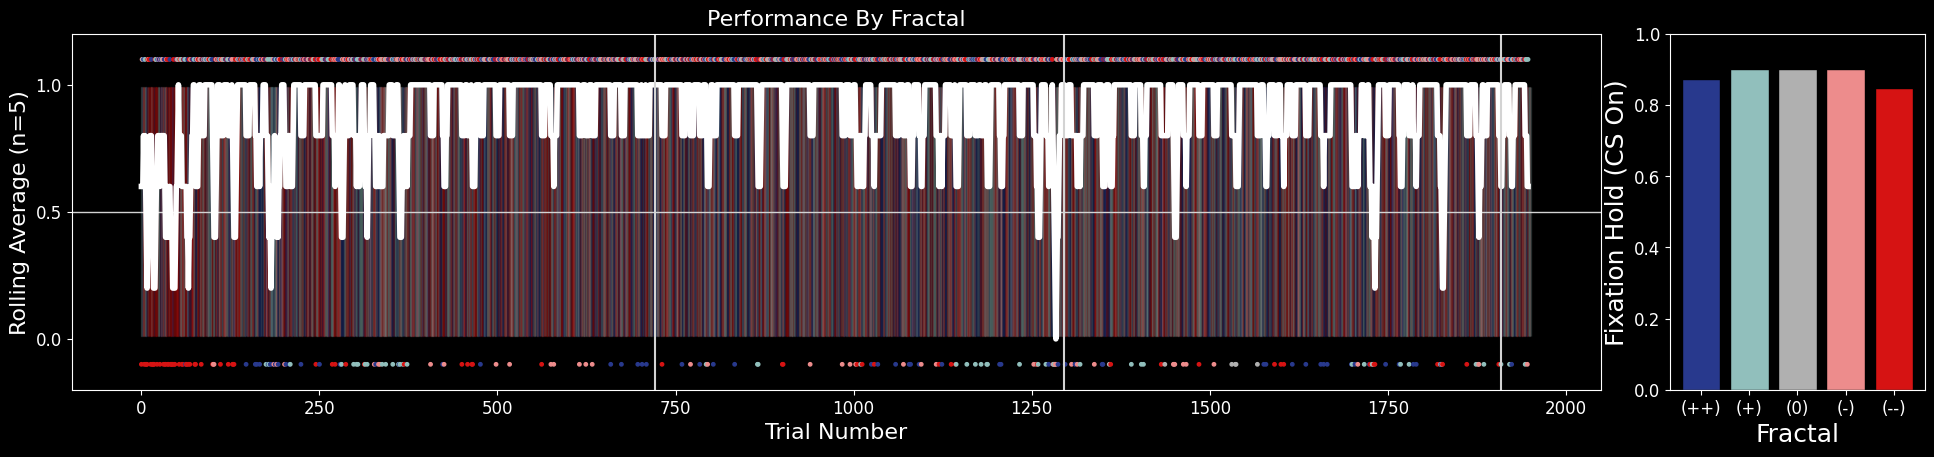

  latency_240801.svg saved.
  latency_240806.svg saved.
  latency_240815.svg saved.
  latency_240818.svg saved.
  epoch_hist.png saved.


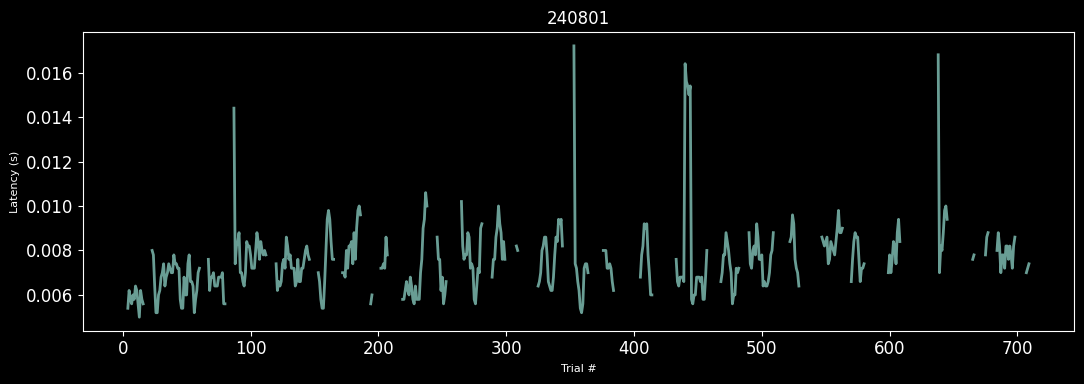

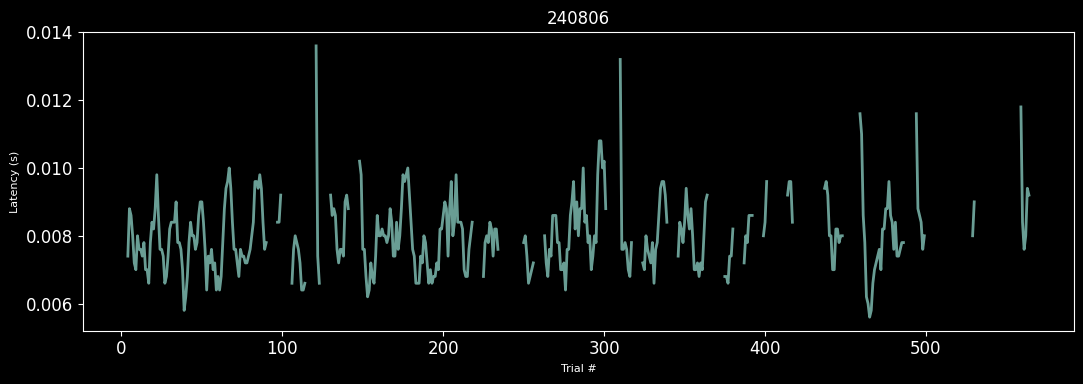

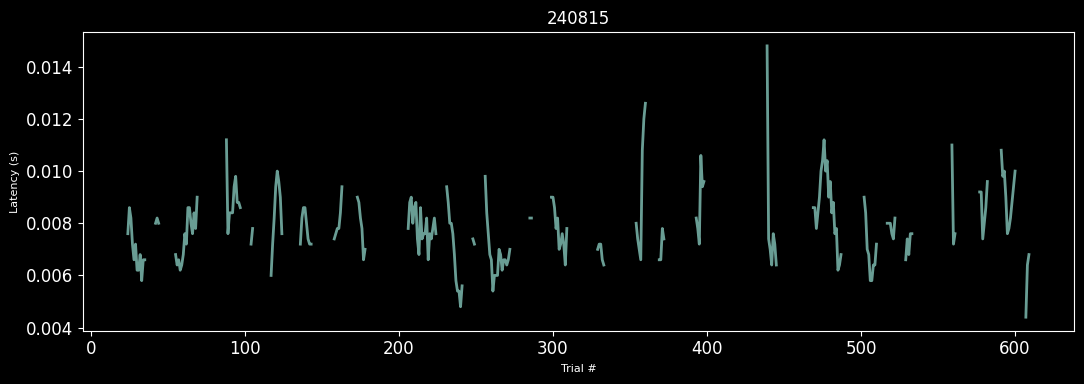

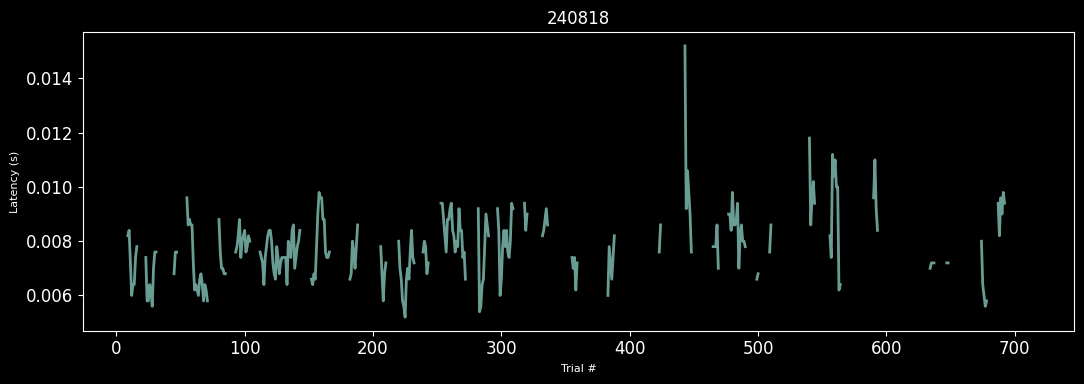

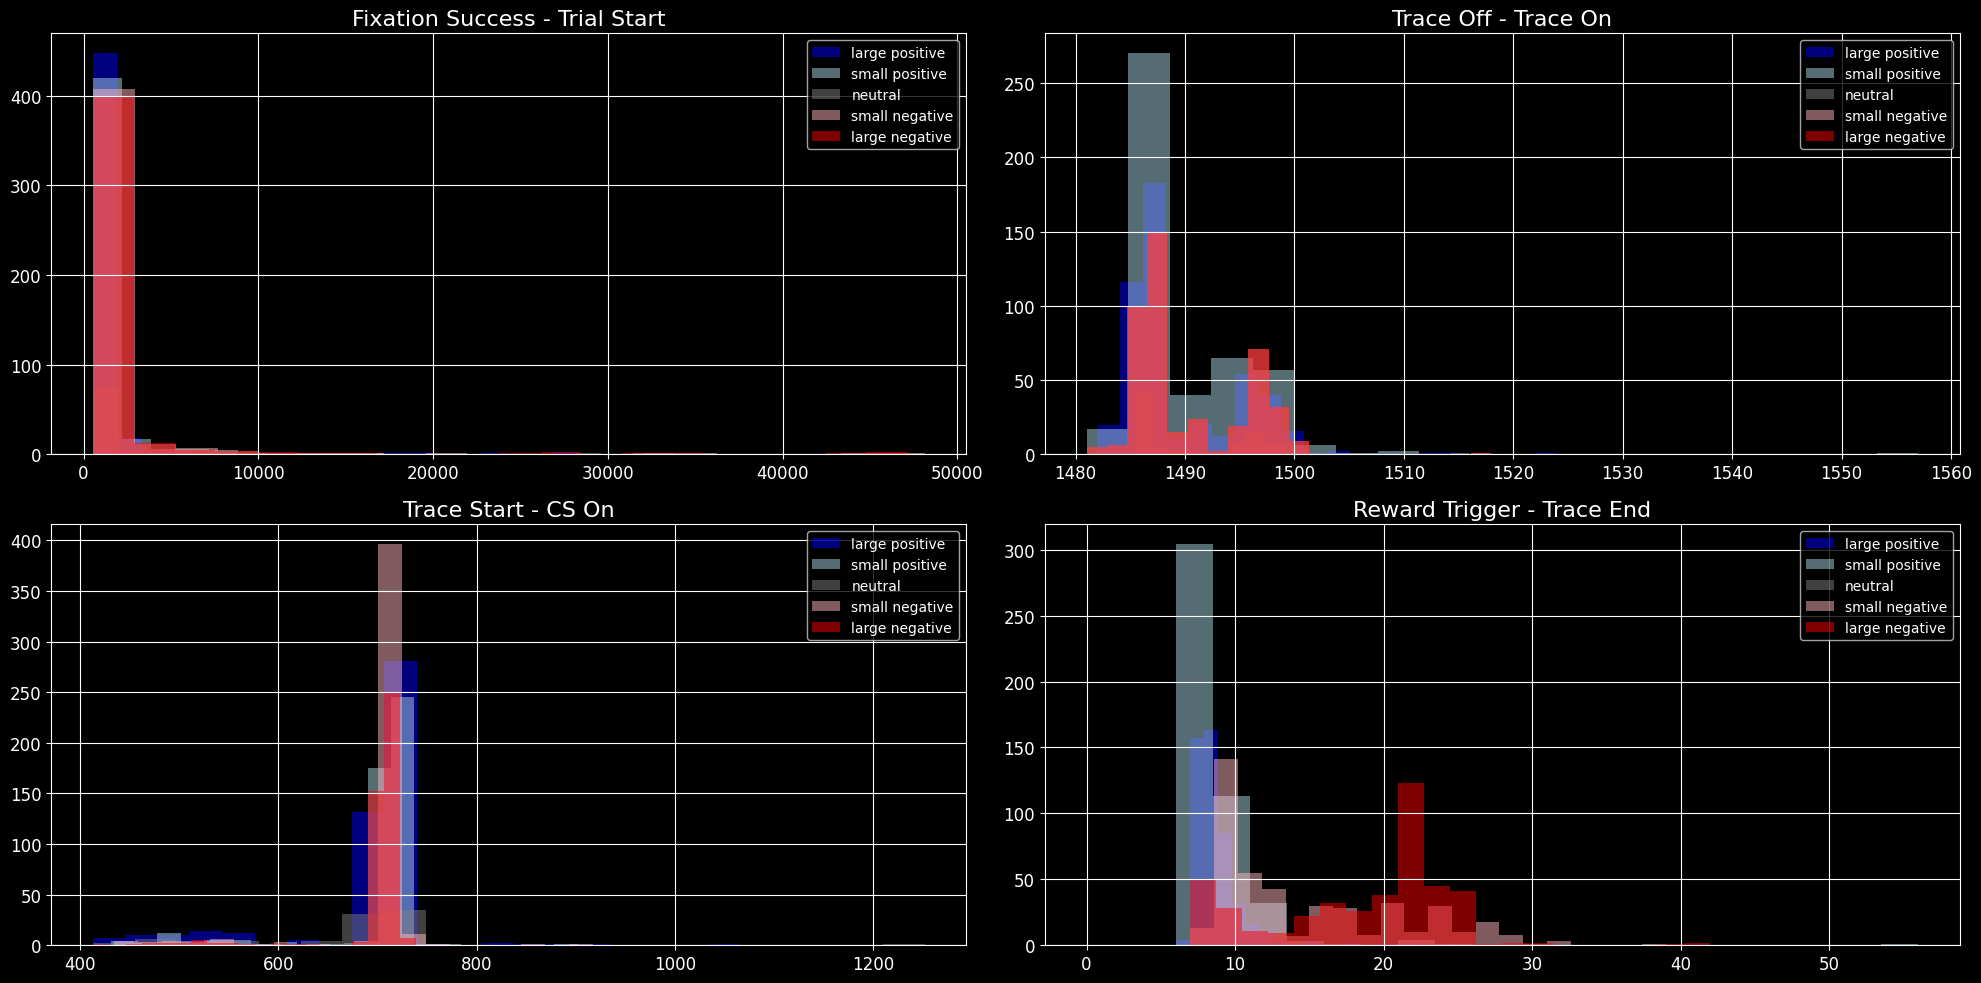

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: 0.031 | Blink Correlation: 0.153
  Valence 0.5: Lick Correlation: 0.128 | Blink Correlation: -0.019
  Valence -0.5: Lick Correlation: -0.202 | Blink Correlation: 0.037
  Valence -1.0: Lick Correlation: 0.147 | Blink Correlation: 0.021
Block: 2
  Valence 1.0: Lick Correlation: 0.149 | Blink Correlation: 0.077
  Valence 0.5: Lick Correlation: 0.039 | Blink Correlation: -0.106
  Valence -0.5: Lick Correlation: -0.051 | Blink Correlation: 0.025
  Valence -1.0: Lick Correlation: -0.065 | Blink Correlation: -0.18
Block: 3
  Valence 1.0: Lick Correlation: 0.017 | Blink Correlation: -0.167
  Valence 0.5: Lick Correlation: -0.058 | Blink Correlation: 0.117
  Valence -0.5: Lick Correlation: 0.104 | Blink Correlation: -0.044
  Valence -1.0: Lick Correlation: 0.111 | Blink Correlation: -0.19
Block: 4
  Valence 1.0: Lick Correlation: 0.358 | Blink Correlation: -0.375
  Valence 0.5: Lick Correlation: -0.138 | Blink Correlation: -0.

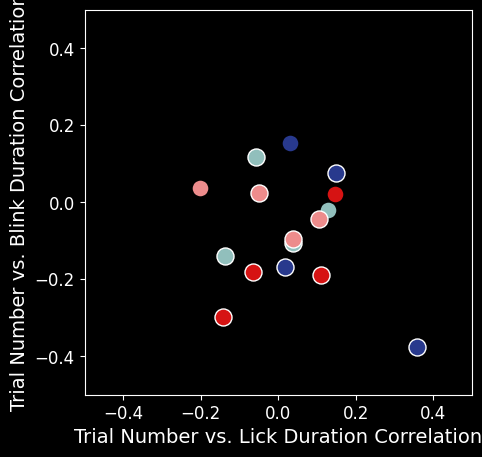

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
Not enough trials for condition: 1
Not enough trials for condition: 2
Not enough trials for condition: 3
Not enough trials for condition: 4
 [0.0, 0.5, 1.0] ANOVA 1.413 | P-value: 2.45E-01
  (0, 1) T-value: -1.211 P-value: 2.29E-01 |  Z-value: -1.43 P-value: 1.53E-01
    0 Lick Mean: 0.006 Lick Std: 0.036 Trials: 123
    1 Lick Mean: 0.016 Lick Std: 0.067 Trials: 67
  (0, 2) T-value: -1.523 P-value: 1.30E-01 |  Z-value: -1.583 P-value: 1.14E-01
    0 Lick Mean: 0.006 Lick Std: 0.036 Trials: 123
    2 Lick Mean: 0.015 Lick Std: 0.045 Trials: 87
  (1, 2) T-value: 0.191 P-value: 8.49E-01 |  Z-value: 0.201 P-value: 8.41E-01
    1 Lick Mean: 0.016 Lick Std: 0.067 Trials: 67
    2 Lick Mean: 0.015 Lick Std: 0.045 Trials: 87
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 18.311 | P-value: 3.44E-08
  (0, 1) T-value: -4.881 P-value: 4.70E-06 |  Z-value: -5.4 P-value: 6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (--) vs (-): ks_stat: 0.02, p_val: 1.00E+00
  (--) vs (0): ks_stat: 0.04, p_val: 1.00E+00
  (--) vs (+): ks_stat: 0.03, p_val: 9.93E-01
  (--) vs (++): ks_stat: 0.04, p_val: 8.92E-01
  (-) vs (0): ks_stat: 0.04, p_val: 9.98E-01
  (-) vs (+): ks_stat: 0.03, p_val: 9.91E-01
  (-) vs (++): ks_stat: 0.04, p_val: 8.70E-01
  (0) vs (+): ks_stat: 0.05, p_val: 9.89E-01
  (0) vs (++): ks_stat: 0.04, p_val: 1.00E+00
  (+) vs (++): ks_stat: 0.03, p_val: 9.62E-01
Blink
  (--) vs (-): ks_stat: 0.23, p_val: 2.24E-11
  (--) vs (0): ks_stat: 0.1, p_val: 4.31E-01
  (--) vs (+): ks_stat: 0.28, p_val: 3.37E-16
  (--) vs (++): ks_stat: 0.18, p_val: 3.31E-07
  (-) vs (0): ks_stat: 0.16, p_val: 3.54E-02
  (-) vs (+): ks_stat: 0.11, p_val: 1.00E-02
  (-) vs (++): ks_stat: 0.08, p_val: 7.89E-02
  (0) vs (+): ks_stat: 0.22, p_val: 1.06E-03
  (0) vs (++): ks_stat: 0.14, p_val: 9.69E-02
  (+) vs (++): ks_stat: 0.12, p_val: 2.70E-03
Total Eye Positio

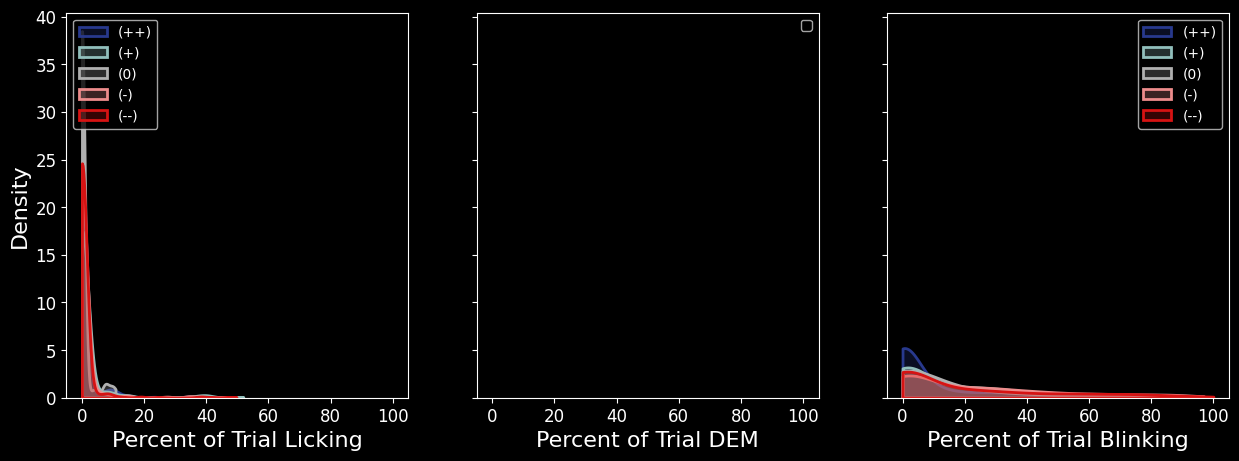

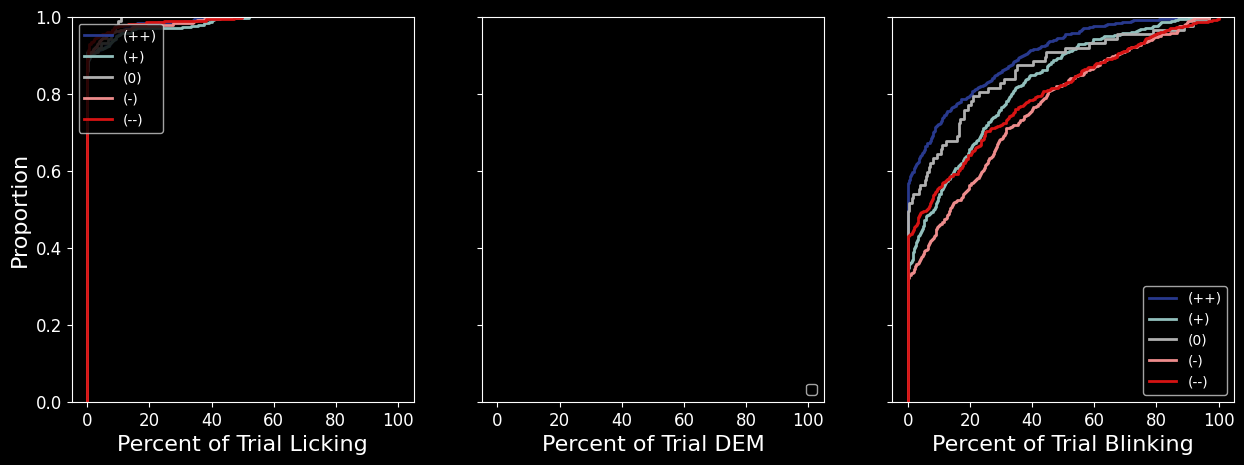

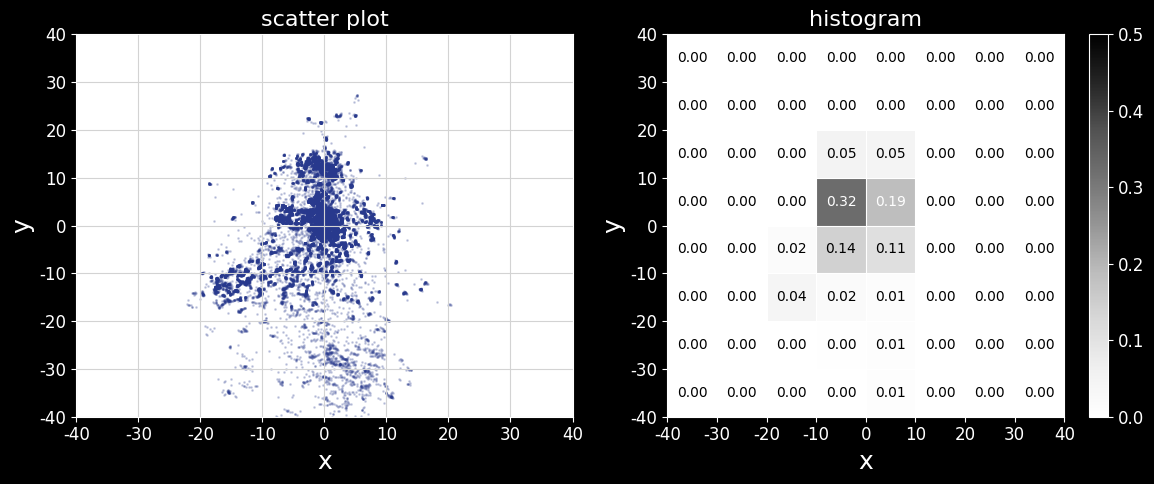

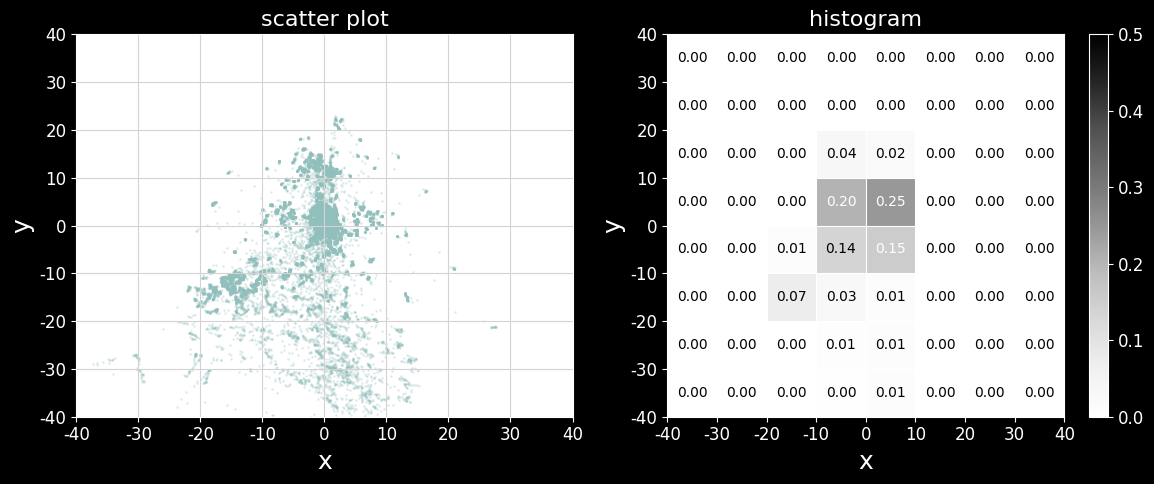

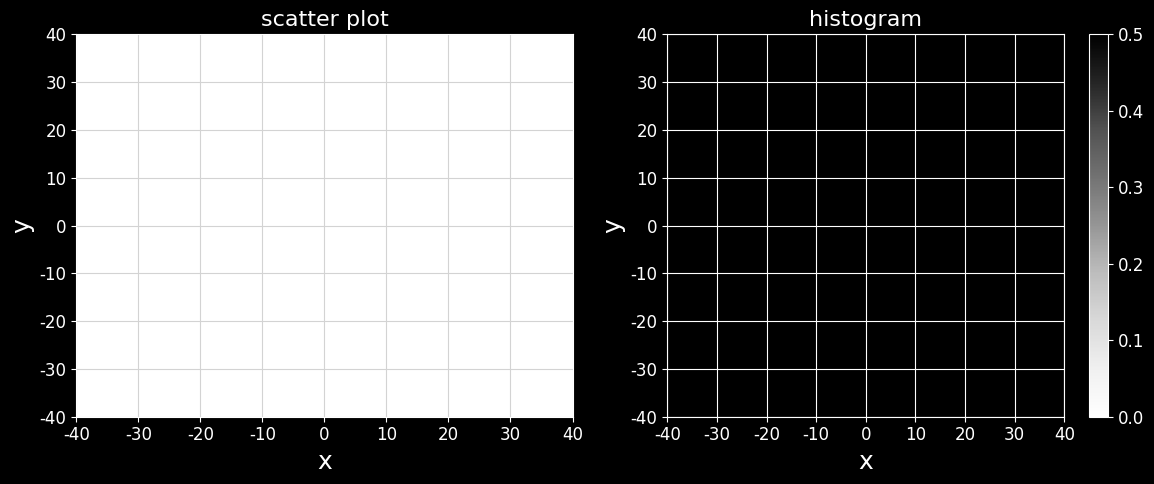

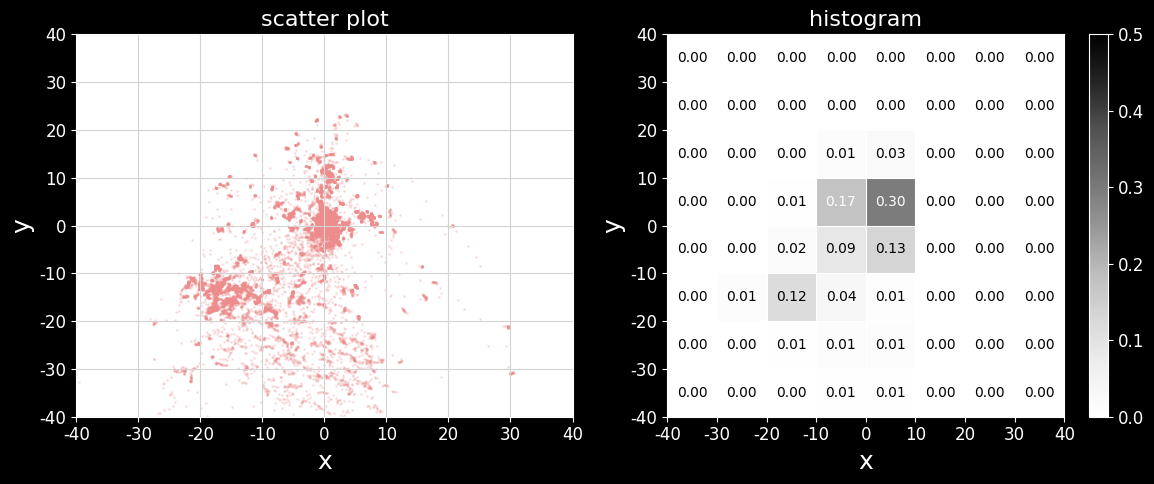

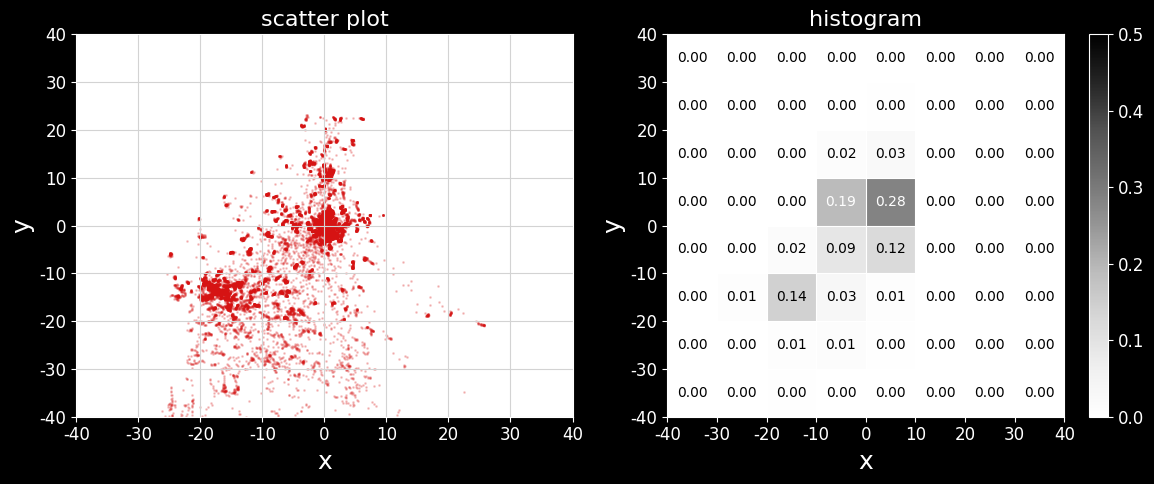

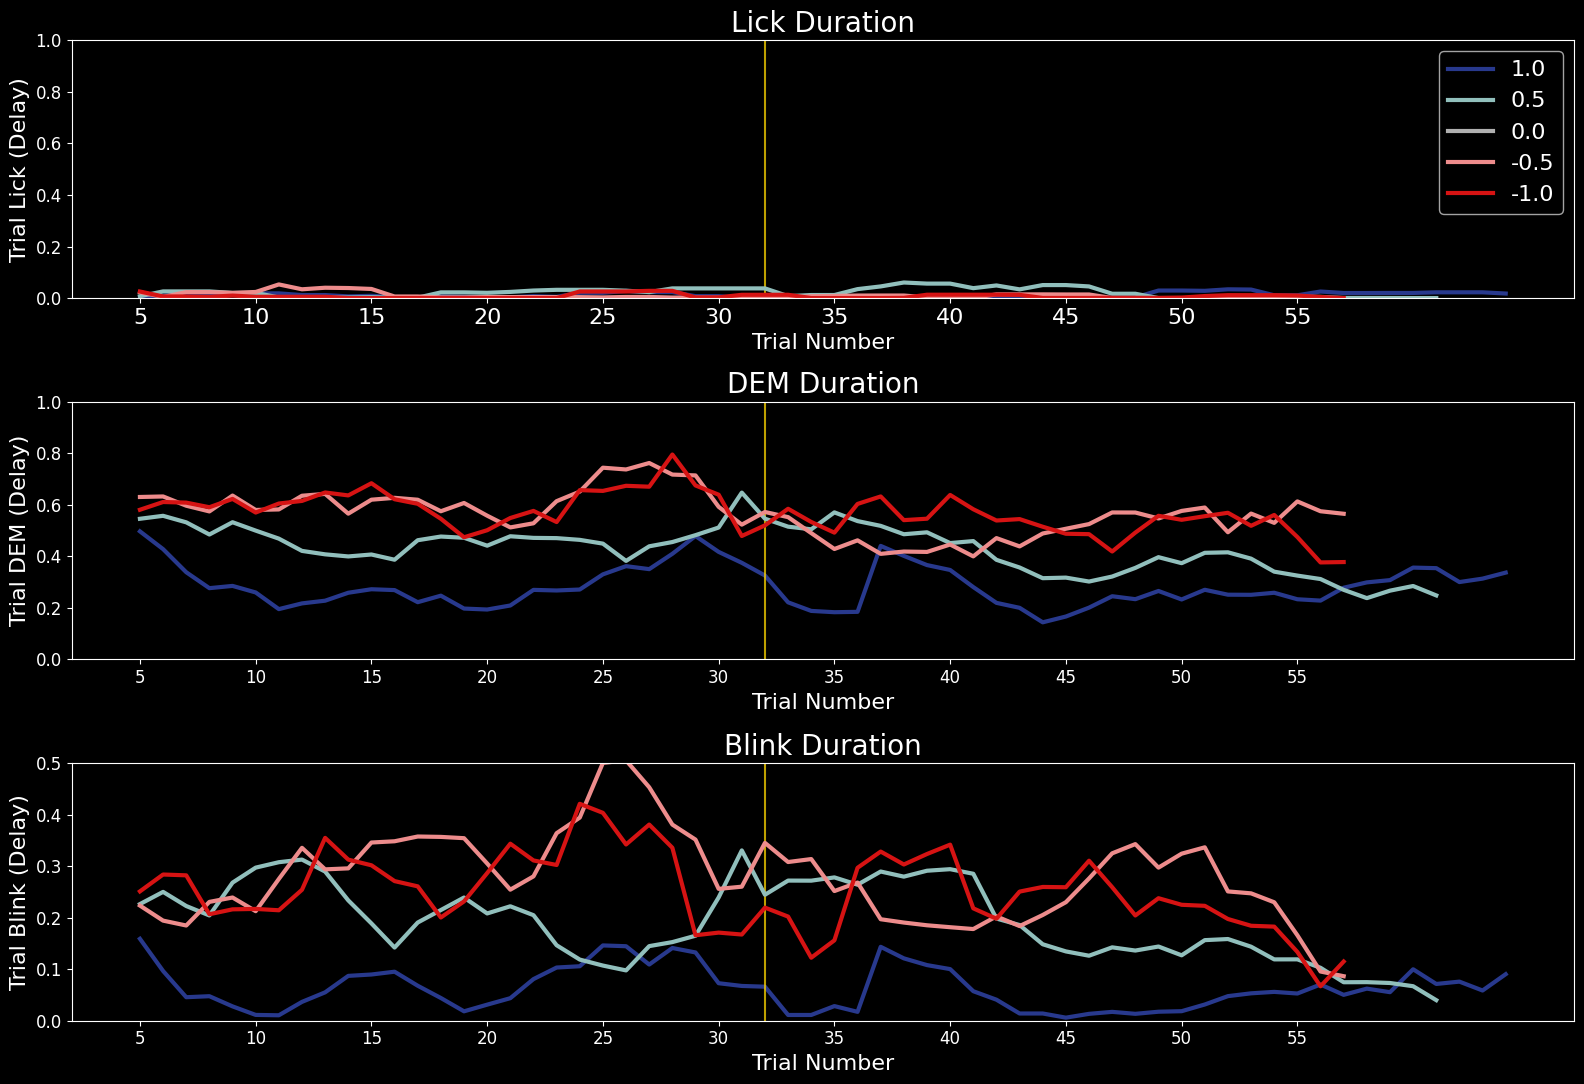

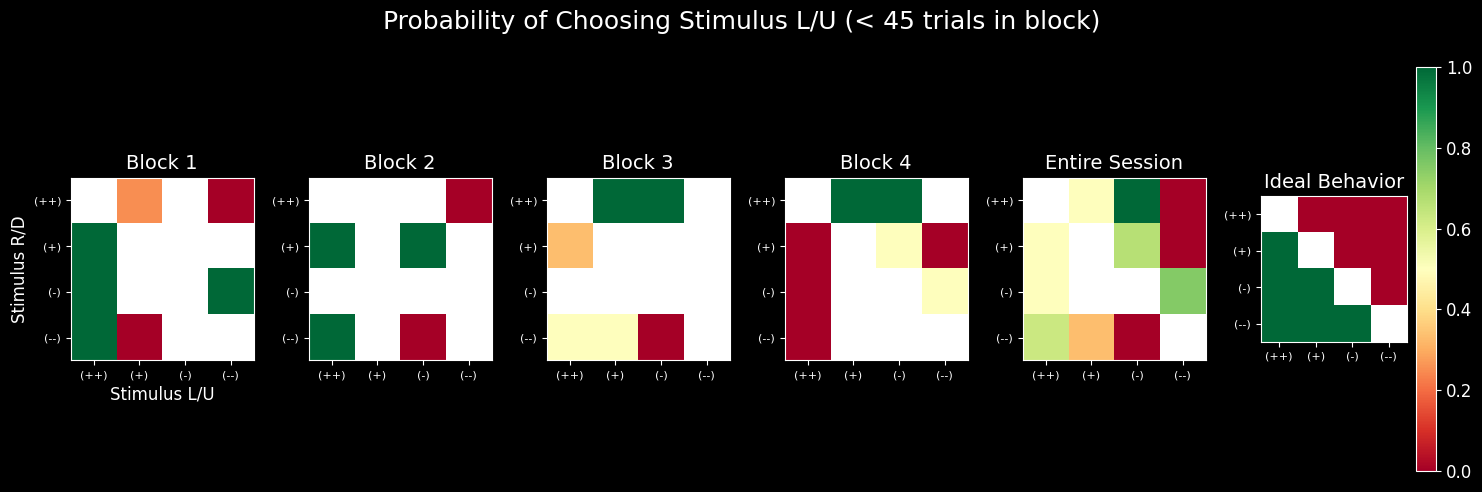

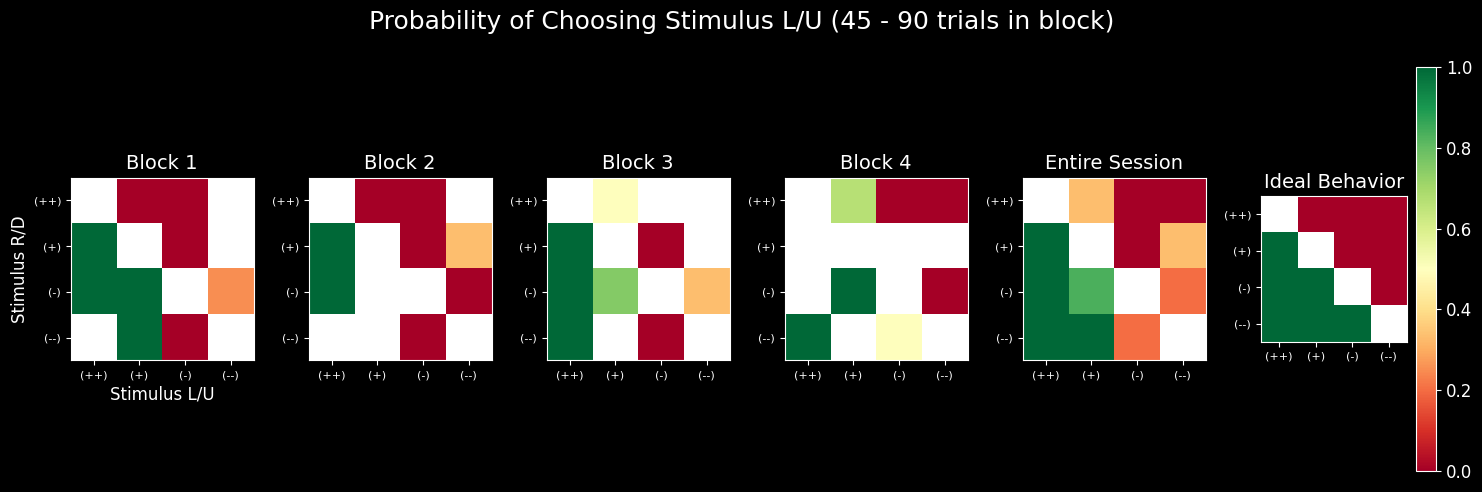

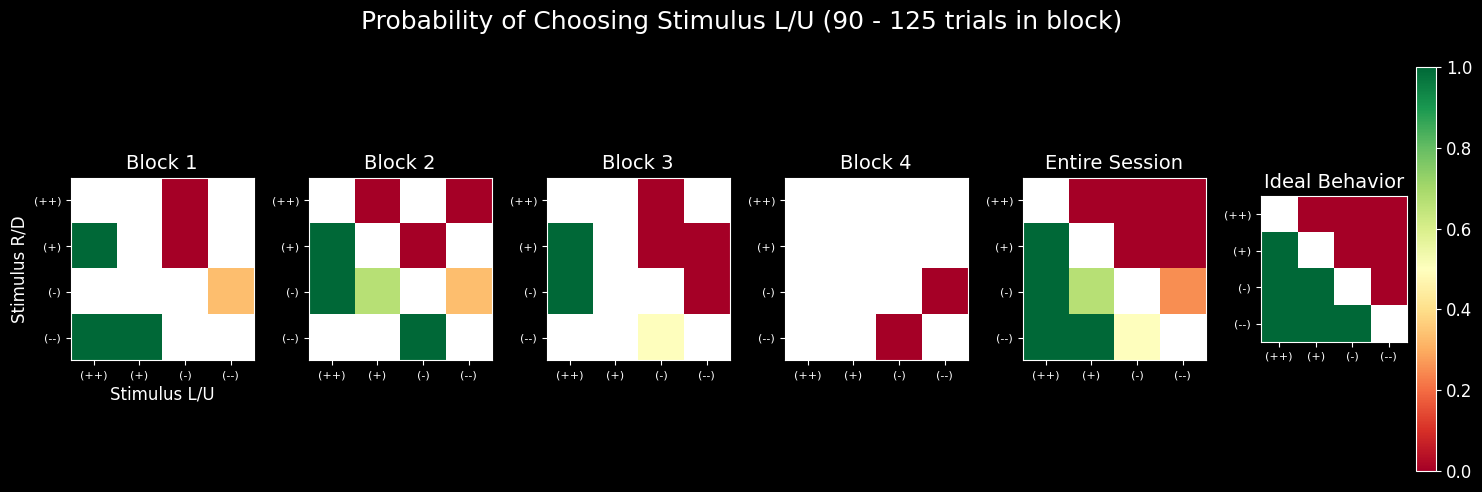

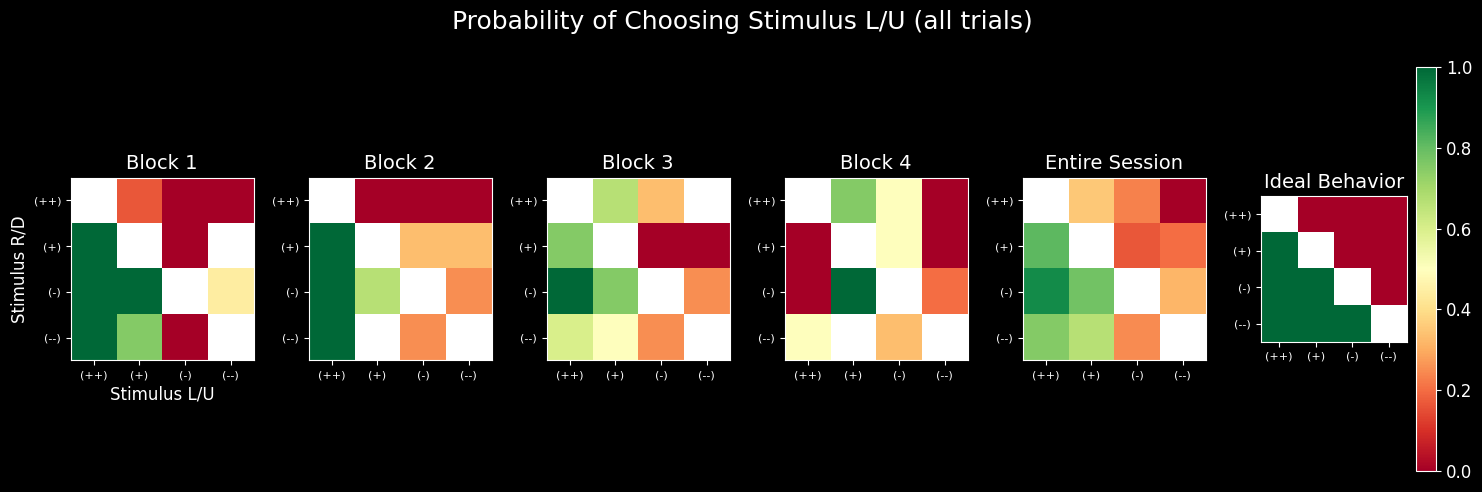

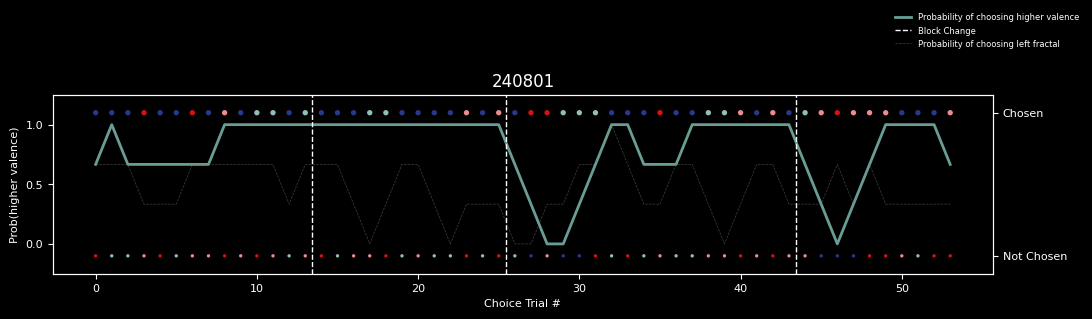

  df_choice_valence_240806.svg saved.


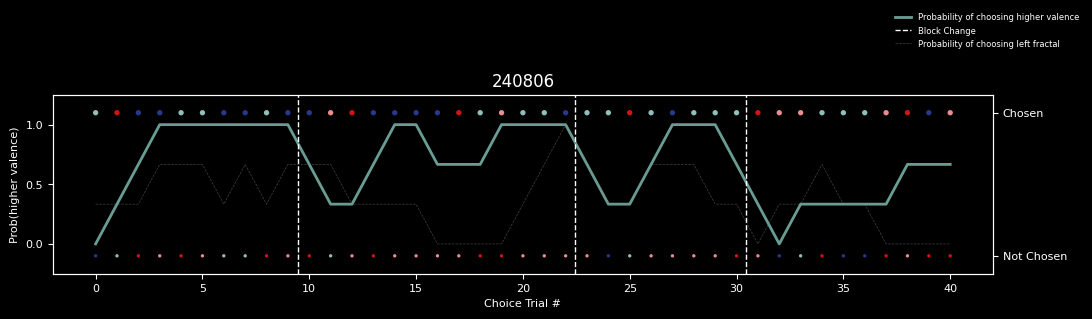

  df_choice_valence_240815.svg saved.


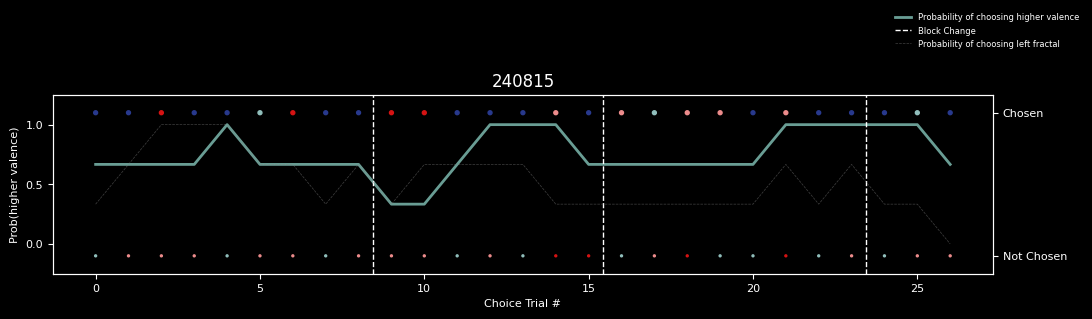

  df_choice_valence_240818.svg saved.


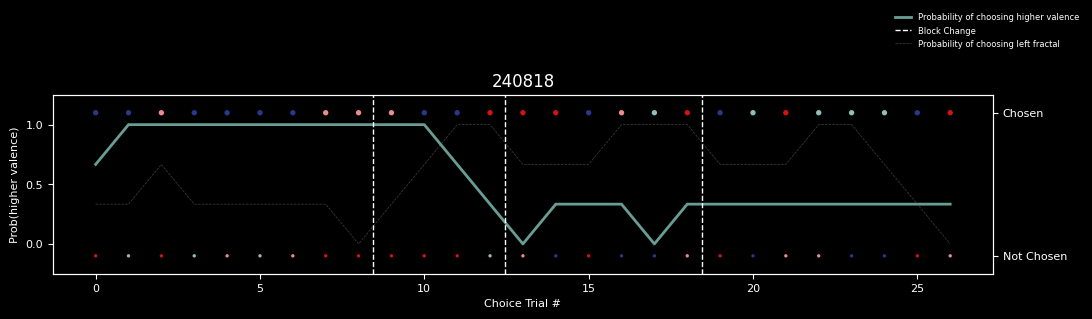

Reward vs. Airpuff Accuracy: 0.58 (+/- 0.06)
  lick_duration: 0.433
  blink_duration_offscreen: -0.487
  pupil_raster_window_avg: -0.842
  blink_duration_window: -0.425
  eye_distance: 0.003


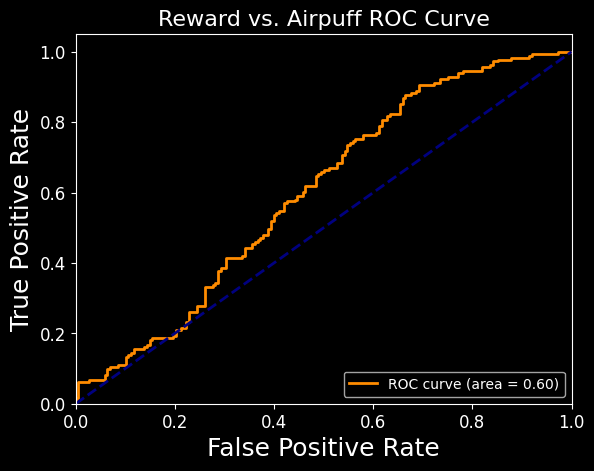

Large Reward vs. Small Reward Accuracy: 0.54 (+/- 0.16)
  lick_duration: -0.608
  blink_duration_offscreen: -0.227
  pupil_raster_window_avg: -0.172
  blink_duration_window: -0.55
  eye_distance: -0.002


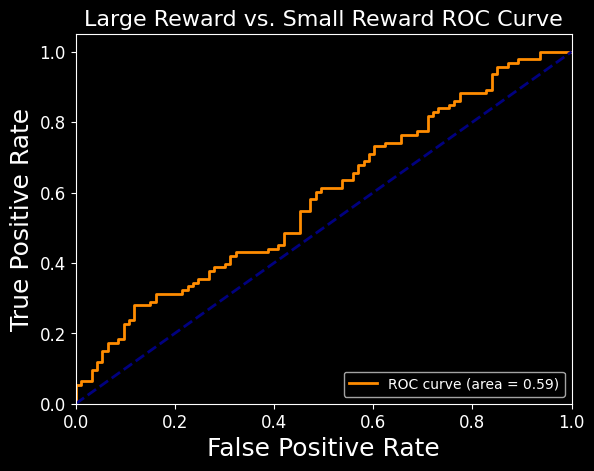

Large Airpuff vs. Small Airpuff Accuracy: 0.55 (+/- 0.08)
  lick_duration: -0.197
  blink_duration_offscreen: -0.314
  pupil_raster_window_avg: 0.199
  blink_duration_window: 0.319
  eye_distance: -0.003


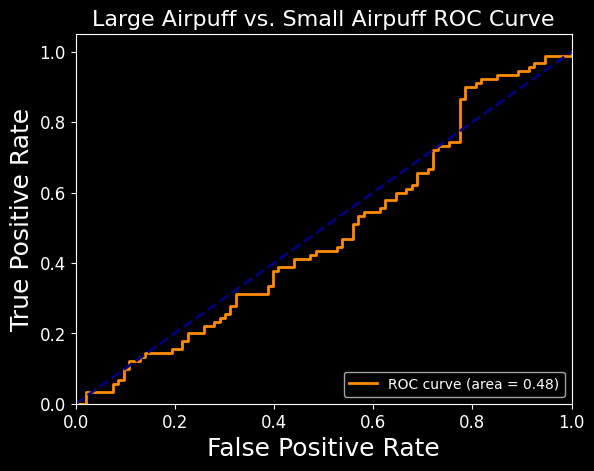


Generating session summary: d:/Rahim/_behavior\markdowns
  Writing 20240801_aragorn.md
  Writing 20240806_aragorn.md
  Writing 20240815_aragorn.md
  Writing 20240818_aragorn.md
Writing to excel...
  Writing 240806 to Emotion_Tracker.xlsx
  Writing 240815 to Emotion_Tracker.xlsx
  Writing 240818 to Emotion_Tracker.xlsx


In [90]:
from analyses.run_functions import run_functions

session_obj = run_functions(session_df, session_obj, path_obj, 
														behavioral_code_dict, error_dict)

### Look at lick rate by block for novel fractals

Analyzing Lick Difference Between Blocks
  Block 1: ~3.89 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=104)
    Valence -0.5: ~0.0  outcome/trial (n=103)
    Valence 0.0 : ~0.0  outcome/trial (n=18)
    Valence 0.5 : ~4.52 outcome/trial (n=108)
    Valence 1.0 : ~10.98 outcome/trial (n=114)
  Block 2: ~3.66 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=110)
    Valence -0.5: ~0.0  outcome/trial (n=112)
    Valence 0.0 : ~0.0  outcome/trial (n=17)
    Valence 0.5 : ~4.52 outcome/trial (n=112)
    Valence 1.0 : ~11.02 outcome/trial (n=106)
  Block 3: ~3.73 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=106)
    Valence -0.5: ~0.0  outcome/trial (n=113)
    Valence 0.0 : ~0.0  outcome/trial (n=16)
    Valence 0.5 : ~4.52 outcome/trial (n=109)
    Valence 1.0 : ~10.99 outcome/trial (n=109)
  Block 4: ~3.66 drops/trial
    Valence -1.0: ~0.0  outcome/trial (n=89)
    Valence -0.5: ~0.0  outcome/trial (n=84)
    Valence 0.0 : ~0.0  outcome/trial (n=14)
    Valence 0.5 : 

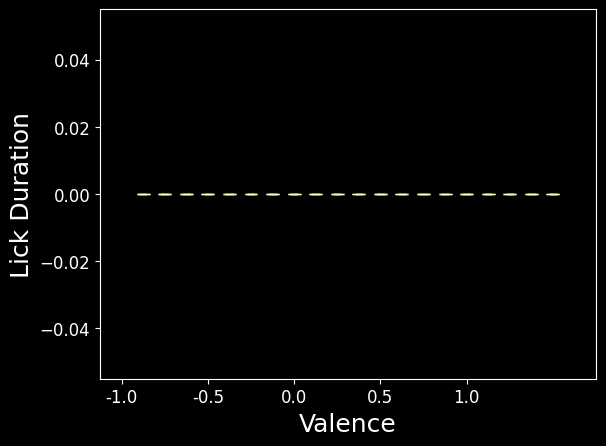

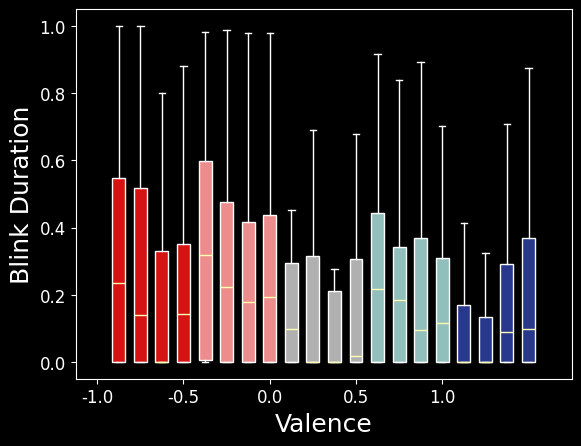

In [92]:
# see the average number of rewarded reinforcement trials in block 1 vs block 2
for behavior_field in ['lick_duration', 'blink_duration_window']:
	behavior = behavior_field.split('_')[0]
	print(f'Analyzing {behavior.capitalize()} Difference Between Blocks')
	f, ax = plt.subplots(1,1, sharey=True)
	session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
	for block in session_df_reinforcement['block'].unique():
		session_df_block = session_df_reinforcement[session_df_reinforcement['block'] == block]
		# skip if <10 trials in the block
		if len(session_df_block) < 10:
			continue
		if behavior == 'lick':
			outcome = 'reward_drops_1'
		else:
			outcome = 'airpuff_mag_1'
		avg_reward_drops_block = session_df_block[outcome].mean()
		print(f'  Block {block}: ~{round(avg_reward_drops_block, 2)} drops/trial')
		unique_valences = sorted(session_df_reinforcement['valence'].unique())
		for vix, valence in enumerate(unique_valences):
			avg_reward_drops_block_valence = session_df_block[session_df_block['valence'] == valence][outcome]
			avg_reward_drops_block_valence_mean = avg_reward_drops_block_valence.mean()
			print(f'    Valence {valence:<4}: ~{round(avg_reward_drops_block_valence_mean, 2):<4} outcome/trial (n={len(avg_reward_drops_block_valence)})')
			session_df_block_fractal = session_df_block[session_df_block['valence'] == valence]
			lick_rate_fractal = session_df_block_fractal[behavior_field].tolist()
			# double box plot of lick rate without outliers where each block value is next to each other
			color = session_obj.valence_colors[valence]
			# set color to color
			pos_shift = 0.25*block
			ax.boxplot(lick_rate_fractal, positions=[vix + pos_shift], patch_artist=True, boxprops=dict(facecolor=color), showfliers=False)
		# set x tick labels for the middle of the double box plot
		ax.set_xticks(range(len(unique_valences)))
		ax.set_xticklabels(unique_valences)
		ax.set_xlabel('Valence')
		ax.set_ylabel(f'{behavior_field.split("_")[0].capitalize()} Duration')

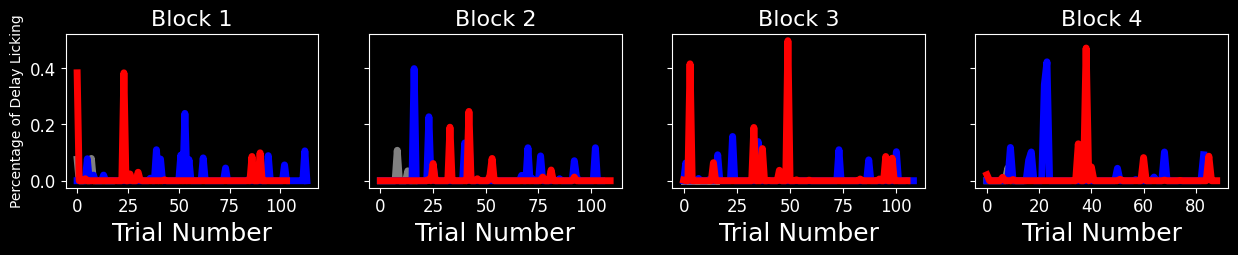

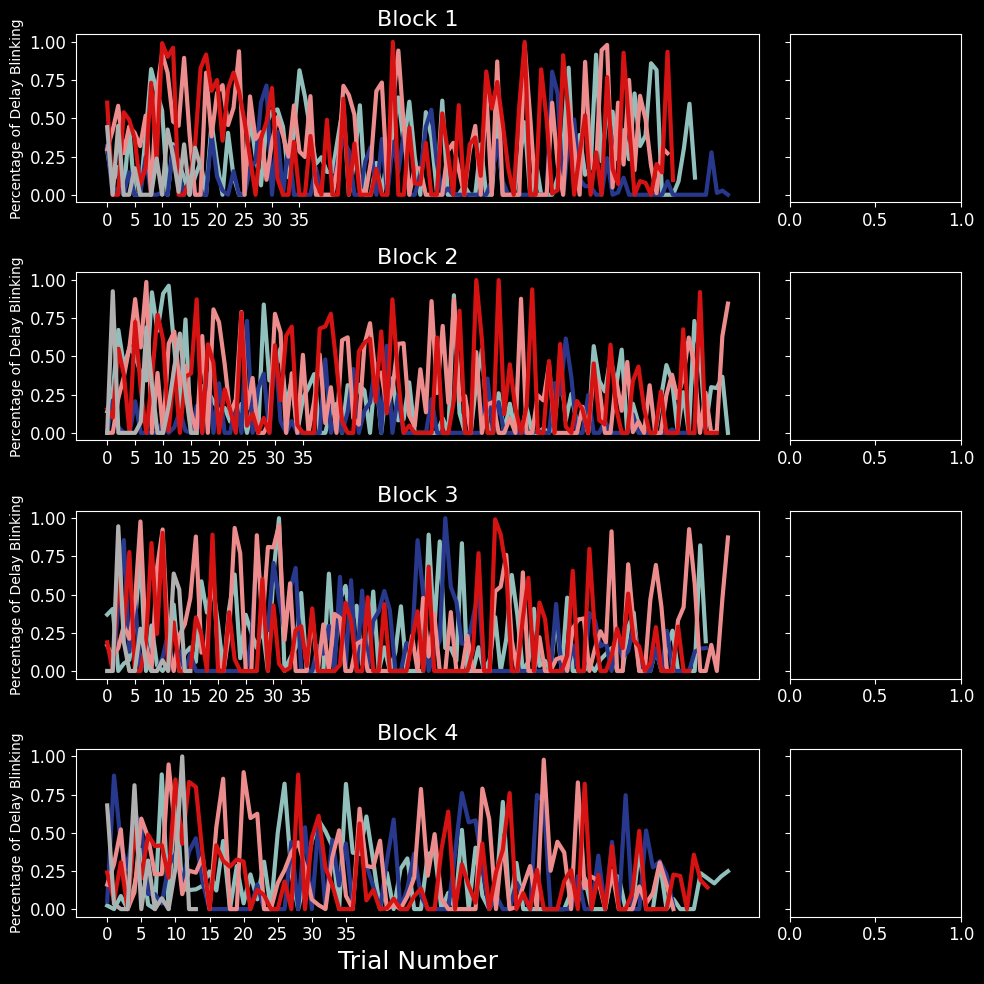

In [93]:
def novel_fractal_summary(session_df):
	session_df_correct = session_df[session_df['correct'] == 1]
	session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
	blocks = session_df_reinforcement['block'].unique()
	valences = session_df_reinforcement['valence'].unique()
	
	f, axarr = plt.subplots(1, len(blocks), figsize=(15, 2), sharey=True)
	for block in blocks:
		session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == block)]
		session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == block)]
		session_novel = session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel') & (session_df_reinforcement['block'] == block)]
		session_high_reward_lick = session_high_reward['lick_duration']
		session_high_airpuff_lick = session_high_airpuff['lick_duration']
		session_novel_lick = session_novel['lick_duration']
		axarr[block-1].plot(range(len(session_novel_lick)), session_novel_lick, label='novel stimuli', color='grey', lw=5)
		axarr[block-1].plot(range(len(session_high_reward_lick)), session_high_reward_lick, label='high reward stimuli', color='blue', lw=5)
		axarr[block-1].plot(range(len(session_high_airpuff_lick)), session_high_airpuff_lick, label='high airpuff stimuli', color='red', lw=5)
		session_neutral = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) &
																									 (session_df_reinforcement['fractal_chosen_novel'] != '_fractal_novel') & 
																									 (session_df_reinforcement['block'] == block)]
		if len(session_neutral) > 0:
			session_neutral_lick = session_neutral['lick_duration']
			axarr[block-1].plot(range(len(session_neutral_lick)), session_neutral_lick, label='neutral stimuli', color='yellow', lw=5)
		# # select row with index block_change
		axarr[block-1].set_xlabel('Trial Number')
		if block == 1:
			axarr[block-1].set_ylabel('Percentage of Delay Licking', fontsize=10)
		axarr[block-1].set_title(f'Block {block}')
	plt.show()

	gs_kw = dict(width_ratios=[4, 1])
	f, axarr = plt.subplots(len(blocks), 2, figsize=(10, 10), gridspec_kw=gs_kw, sharey=True)
	max_fractal_presentations = np.max(session_df_correct['fractal_count_in_block'])
	for block in blocks:
		for valence in valences:
			session_outcome = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == valence) & (session_df_reinforcement['block'] == block)]
			block_blink = session_outcome['blink_duration_window']
			session_high_reward_blink = session_outcome['blink_duration_window']
			color = session_obj.valence_colors[valence]
			axarr[block-1][0].plot(range(len(block_blink)), block_blink, label='neutral stimuli', color=color, lw=3)
			# # select row with index block_change
			if block == len(blocks):
				axarr[block-1][0].set_xlabel('Trial Number')
			axarr[block-1][0].set_ylabel('Percentage of Delay Blinking', fontsize=10)
			axarr[block-1][0].set_title(f'Block {block}')
			axarr[block-1][0].set_xticks(range(0, max_fractal_presentations, 5))
	plt.tight_layout()
	plt.show()

novel_fractal_summary(session_df_correct)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [94]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.881 (1720/1952)
   Valence 1.0: 0.873 (413/473)
   Valence 0.5: 0.901 (421/467)
   Valence 0.0: 0.903 (65/72)
   Valence -0.5: 0.902 (412/457)
   Valence -1.0: 0.847 (409/483)
 Percent successful choice trials: 0.823 (177/215)
   Valence Pair [0.0, 1.0]: 1.0 (5/5)
   Valence Pair [0.5, 1.0]: 0.927 (38/41)
   Valence Pair [-0.5, 0.5]: 0.913 (21/23)
   Valence Pair [-1.0, -0.5]: 0.85 (34/40)
   Valence Pair [0.0, 0.5]: 0.8 (8/10)
   Valence Pair [-0.5, 1.0]: 0.788 (26/33)
   Valence Pair [-1.0, 0.5]: 0.786 (11/14)
   Valence Pair [-1.0, 1.0]: 0.76 (19/25)
   Valence Pair [-1.0, 0.0]: 0.667 (10/15)
   Valence Pair [-0.5, 0.0]: 0.556 (5/9)
 Percent left choice trials: 0.48 (85/177)
 Percent higher valence choice trials: 0.712 (126/177)
   Valence Pair [-0.5, 0.0]: 1.0 (5/5)
   Valence Pair [-0.5, 1.0]: 0.846 (22/26)
   Valence Pair [-1.0, 1.0]: 0.842 (16/19)
   Valence Pair [-0.5, 0.5]: 0.81 (17/21)
   Valence Pair [-1.0, 0.0]

In [95]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement = session_df_reinforcement[session_df_reinforcement['fractal_count_in_block'] > 5]
session_df_reinforcement.groupby(['valence'])\
							[['lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

,lick_duration,blink_duration_offscreen,pupil_raster_window_avg,blink_duration_window,eye_distance
valence,,,,,
-1.0,0.010200,0.510693,0.214572,0.255786,58.371402
-0.5,0.011797,0.515047,0.236925,0.290425,75.645546
0.5,0.018810,0.417071,0.167699,0.218959,81.956597
1.0,0.012893,0.313150,0.081968,0.114781,59.674756


In [96]:
session_df_reinforcement.groupby(['date', 'valence'])\
							[['lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

lick_duration  blink_duration_offscreen  \
date   valence                                            
240801 -1.0          0.010372                  0.607340   
       -0.5          0.027556                  0.637222   
        0.5          0.025217                  0.518704   
        1.0          0.023988                  0.377200   
240806 -1.0          0.021230                  0.601813   
       -0.5          0.009965                  0.634696   
        0.5          0.036011                  0.534599   
        1.0          0.011551                  0.475851   
240815 -1.0          0.001901                  0.459794   
       -0.5          0.003257                  0.300626   
        0.5          0.006042                  0.245737   
        1.0          0.005324                  0.197599   
240818 -1.0          0.005542                  0.349268   
       -0.5          0.004348                  0.444529   
        0.5          0.004511                  0.327496   
        1.0          0.009698                  0.180152   

                pupil_raster_window_avg  blink_duration_window  eye_distance  
date   valence                                                                
240801 -1.0                    0.282660               0.346498     93.572726  
       -0.5                    0.350462               0.414504    128.405034  
        0.5                    0.194833               0.270711    145.775586  
        1.0                    0.042236               0.086458     89.796433  
240806 -1.0                    0.156454               0.182670     43.228019  
       -0.5                    0.194955               0.247442     67.059062  
        0.5                    0.194264               0.241448     68.481468  
        1.0                    0.143267               0.182152     64.068041  
240815 -1.0                    0.275720               0.303521     34.126981  
       -0.5                    0.154022               0.184582     34.181328  
        0.5                    0.116592               0.144786     47.891137  
        1.0                    0.083971               0.105177     32.107368  
240818 -1.0                    0.146070               0.188860     55.117230  
       -0.5                    0.227874               0.289732     63.202614  
        0.5                    0.153103               0.201906     58.045800  
        1.0                    0.056538               0.081646     48.727316

In [97]:
# show all rows
pd.set_option('display.max_rows', None)
session_df_reinforcement.groupby(['date', 'block', 'fractal_chosen_novel', 'valence'])\
							[['fractal_count_in_block', 'lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

fractal_count_in_block  \
date   block fractal_chosen_novel valence                           
240801 1     _fractal_A            1.0                  21.434783   
             _fractal_B            0.5                  17.434783   
             _fractal_C           -0.5                  17.000000   
             _fractal_D           -1.0                  18.041667   
       2     _fractal_A            0.5                  18.130435   
             _fractal_B           -0.5                  18.000000   
             _fractal_C           -1.0                  18.500000   
             _fractal_D            1.0                  18.550000   
       3     _fractal_A           -0.5                  17.958333   
             _fractal_B           -1.0                  17.136364   
             _fractal_C            1.0                  19.666667   
             _fractal_D            0.5                  19.208333   
       4     _fractal_A           -1.0                  16.500000   
             _fractal_B            1.0                  17.909091   
             _fractal_C            0.5                  16.500000   
             _fractal_D           -0.5                  18.300000   
240806 1     _fractal_A            1.0                  20.961538   
             _fractal_B            0.5                  18.833333   
             _fractal_C           -0.5                  16.500000   
             _fractal_D           -1.0                  17.956522   
       2     _fractal_A            0.5                  19.000000   
             _fractal_B           -0.5                  17.875000   
             _fractal_C           -1.0                  18.045455   
             _fractal_D            1.0                  19.909091   
       3     _fractal_A           -0.5                  17.500000   
             _fractal_B           -1.0                  18.541667   
             _fractal_C            1.0                  17.958333   
             _fractal_D            0.5                  20.230769   
       4     _fractal_A           -1.0                  14.777778   
             _fractal_B            1.0                  14.176471   
             _fractal_C            0.5                  17.526316   
             _fractal_D           -0.5                  15.125000   
240815 1     _fractal_A            1.0                  19.909091   
             _fractal_B            0.5                  16.571429   
             _fractal_C           -0.5                  14.500000   
             _fractal_D           -1.0                  17.000000   
       2     _fractal_A            0.5                  16.619048   
             _fractal_B           -0.5                  17.391304   
             _fractal_C           -1.0                  15.500000   
             _fractal_D            1.0                  18.695652   
       3     _fractal_A           -0.5                  17.000000   
             _fractal_B           -1.0                  16.500000   
             _fractal_C            1.0                  16.761905   
             _fractal_D            0.5                  17.272727   
       4     _fractal_A           -1.0                  10.000000   
             _fractal_B            1.0                   9.500000   
             _fractal_C            0.5                  10.375000   
             _fractal_D           -0.5                   9.500000   
240818 1     _fractal_A            1.0                  21.666667   
             _fractal_B            0.5                  16.000000   
             _fractal_C           -0.5                  17.714286   
             _fractal_D           -1.0                  14.500000   
       2     _fractal_A            0.5                  17.000000   
             _fractal_B           -0.5                  16.500000   
             _fractal_C           -1.0                  18.782609   
             _fractal_D            1.0                  17.454545   
       3     _fractal_A           -0.5   

In [ ]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

### Behavioral Summary Panels by Valence

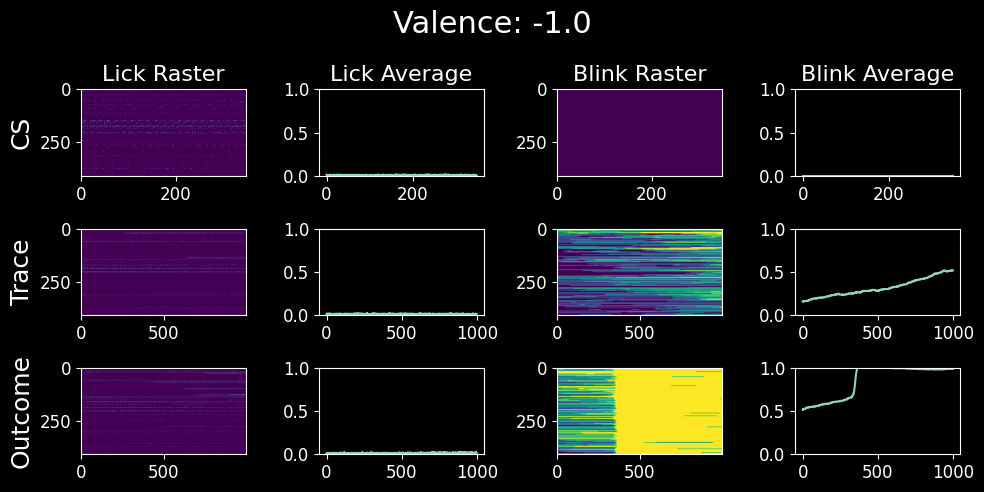

Valence: -1.0
  Lick CS: 0.009
  Lick Trace: 0.01
  Lick Outcome: 0.012


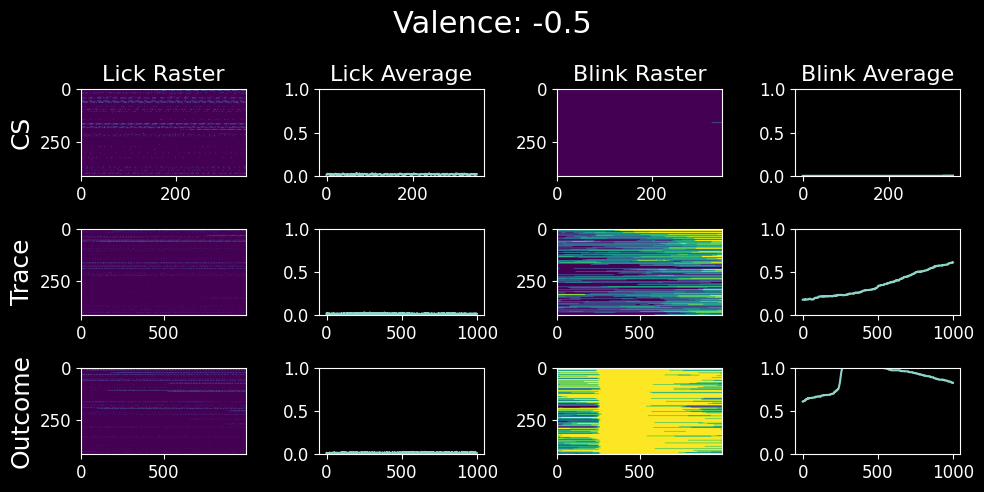

Valence: -0.5
  Lick CS: 0.017
  Lick Trace: 0.013
  Lick Outcome: 0.015


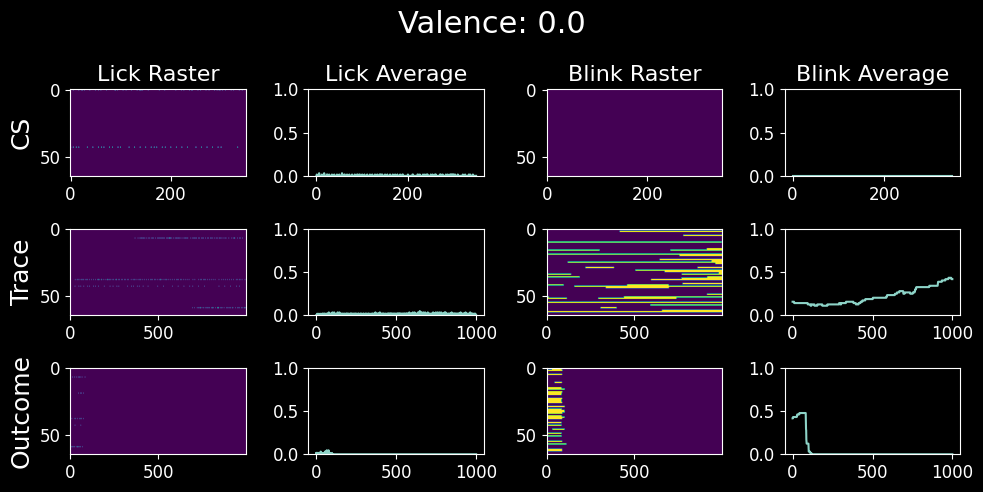

Valence: 0.0
  Lick CS: 0.003
  Lick Trace: 0.005
  Lick Outcome: 0.001


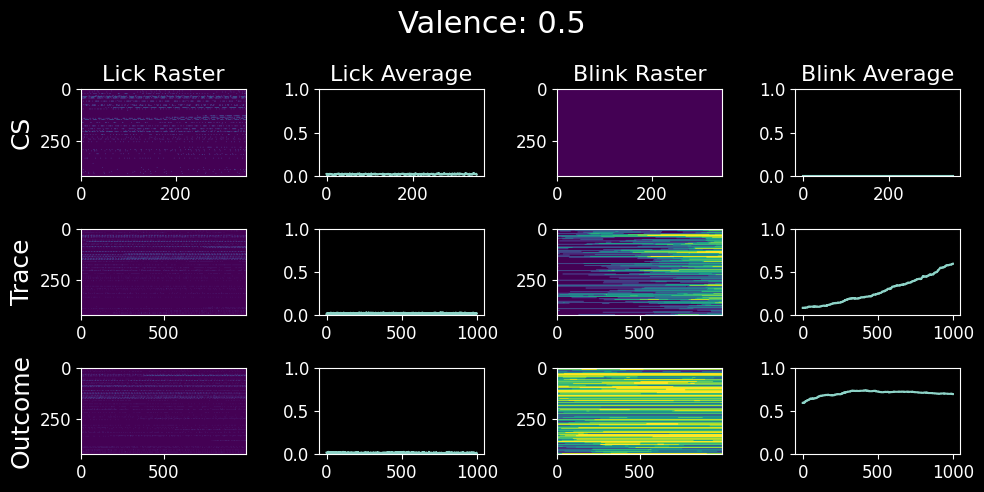

Valence: 0.5
  Lick CS: 0.018
  Lick Trace: 0.017
  Lick Outcome: 0.014


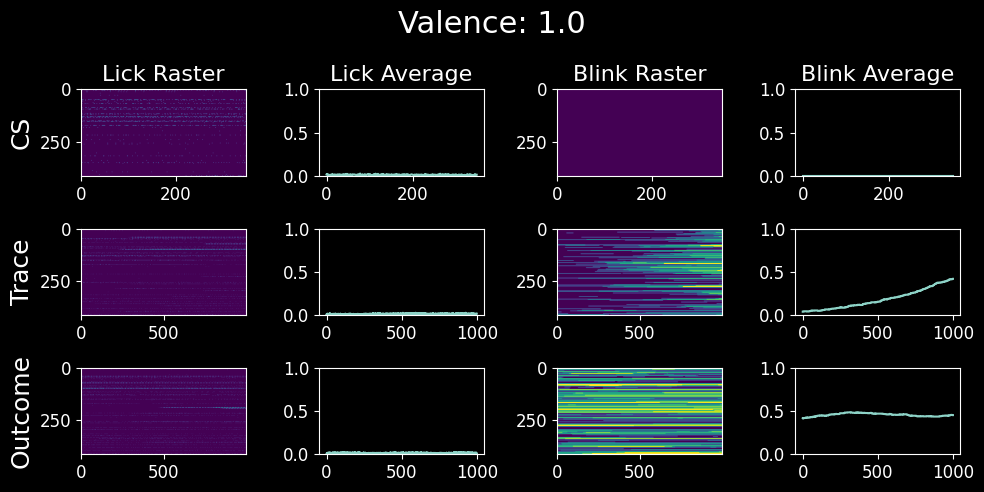

Valence: 1.0
  Lick CS: 0.012
  Lick Trace: 0.011
  Lick Outcome: 0.013


In [98]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

In [ ]:
session_df_correct[['date', 'trial_num', 'block', 'correct_trial_in_block', 'valence', 'fractal_chosen', 
										'fractal_not_chosen', 'lick_duration', 'blink_duration_offscreen', 
										'eye_distance']]

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [100]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 100) &
											 (session_df_correct['lick_duration'] > 0.8)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

,date,trial_num,block,valence,fractal_chosen,fractal_not_chosen,lick_duration,blink_duration_offscreen,eye_distance


### High DEM + Blink + Eye Movement / Low Lick Trials

In [107]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.8) &
											 (session_df_correct['eye_distance'] > 70) & 
											 (session_df_correct['lick_duration'] < 0.2)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

,date,trial_num,block,valence,fractal_chosen,fractal_not_chosen,lick_duration,blink_duration_offscreen,eye_distance
1,240801,2,1,1.0,_fractal_A,_fractal_A,0.000,0.806154,732.724039
27,240801,28,1,-1.0,_fractal_D,_fractal_D,0.000,0.810000,73.796476
93,240801,94,1,-0.5,_fractal_C,_fractal_C,0.000,0.950000,218.021648
95,240801,96,1,-1.0,_fractal_D,_fractal_D,0.000,0.952308,72.068040
109,240801,110,1,0.5,_fractal_B,_fractal_B,0.000,0.817692,71.851971
133,240801,134,1,-0.5,_fractal_C,_fractal_C,0.000,0.994615,97.990109
138,240801,139,1,-0.5,_fractal_C,_fractal_C,0.000,0.922308,221.500926
143,240801,144,1,0.5,_fractal_B,_fractal_B,0.074,0.819231,81.486400
150,240801,151,1,0.5,_fractal_B,_fractal_C,0.000,0.890769,189.941179
164,240801,165,1,-1.0,_fractal_D,_fractal_D,0.000,0.961538,227.986423


In [108]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation 0.04
Lick vs. Blink Correlation 0.032
DEM vs. Blink Correlation 0.613
Pupil 0 vs. Blink Correlation 0.975


***
## Single Trial Analysis

In [109]:
trial_num_selected = 30
trial_df_selected = session_df[session_df['trial_num'] == trial_num_selected]
trial_df_selected[['correct',
										 'valence',
										 'fractal_chosen',
										 'fractal_not_chosen',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
										 'blink_duration_window',
										 'eye_distance',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

,correct,valence,fractal_chosen,fractal_not_chosen,lick_duration,blink_duration_sig,blink_duration_offscreen,pupil_raster_window_avg,blink_duration_window,eye_distance,eye_distance,Outcome Start,Reward Trigger,Airpuff Trigger
29,1,0.5,_fractal_B,_fractal_B,0.0,0.363077,0.763077,0.363077,0.441538,231.041876,231.041876,4731,4742,<NA>
750,1,-1.0,_fractal_D,_fractal_B,0.0,0.000000,0.914615,0.000000,0.000000,50.634927,50.634927,4984,<NA>,4995
1324,1,-0.5,_fractal_C,_fractal_C,0.0,0.000000,0.470000,0.000000,0.000000,41.736647,41.736647,4634,<NA>,4646
1938,1,1.0,_fractal_A,_fractal_A,0.0,0.000000,0.000000,0.000000,0.000000,24.220854,24.220854,4882,4894,<NA>


In [ ]:
def plot_eye_single_trial(session_df, trial_num, epoch_start, epoch_end):
	# 3 figures, where the left one is twice as tall as the other two
	f, axarr = plt.subplots(1, 1, figsize=(7.5, 5))
	trial = session_df[session_df['trial_num'] == trial_num]
	epoch_start_time = trial[epoch_start].iloc[0]
	epoch_end_time = trial[epoch_end].iloc[0]
	trial_eye_x = trial['eye_x'].tolist()[0][epoch_start_time:epoch_end_time]
	trial_eye_y = trial['eye_y'].tolist()[0][epoch_start_time:epoch_end_time]
	# trial_eye_x = trial['eye_x'].iloc[0]
	# trial_eye_y = trial['eye_y'].iloc[0]
	# show heat map
	plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
	plt.colorbar()
	plt.xlim(-40, 40)
	plt.ylim(-40, 40)
	plt.title(f'Trial {trial_num} - {epoch_start} to {epoch_end}')
	plt.xlabel('Eye X Position')
	plt.ylabel('Eye Y Position')
	plt.show()

plot_eye_single_trial(session_df, trial_num_selected, 
											epoch_start='Trace Start', epoch_end='Trace End')

In [ ]:
plt.style.use('dark_background')
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_num_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [ ]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
	0: 'cam_sync',
	1: 'cam_save',
	2: 'lick',
	3: 'photodiode',
	4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
					'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [ ]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

In [ ]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
					'session_obj': session_obj, 
					'trial_start': 0,
					'trial_end': len(session_obj.df),
					'epoch_start': 'Trace Start', 
					'epoch_end': 'Outcome Start', 
					'thread_flag': True}

parse_wm_videos(**kwargs)

***
## Generate MonkeyLogic Behavior Trial Videos

In [ ]:
import warnings
import seaborn as sns
from dlc_primate.dlc_analysis import generate_marker_df, plot_bodypart_likelihoods

# turn off UserWarning: FixedFormatter should only be used together with FixedLocator
warnings.filterwarnings("ignore", category=UserWarning)
video_folder = '/Users/rahimhashim/Downloads/231223_Gandalf_Segmented'

dlc_df_dict = generate_marker_df(video_folder)
body_part_likelihoods = plot_bodypart_likelihoods(dlc_df_dict)

In [ ]:
dlc_df_dict['gandalf']

In [ ]:
# monkey = session_obj.monkey
monkey = 'gandalf'
# date = session_obj.date
date = '231223'
trial = list(dlc_df_dict[monkey][date].keys())[0]
dlc_df_dict[monkey][date][trial]['e3v8360']

In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt

# plot all the x,y positions for top 10 body parts
all_body_parts = list(body_part_likelihoods.keys())
# selected_body_parts = list(body_part_likelihoods.keys()[:10])
selected_body_parts = [body_part for body_part in all_body_parts]
# make colormap of length 'selected_body_parts'
colors = sns.color_palette('husl', len(selected_body_parts))
# make dictionary from colors
color_dict = {selected_body_parts[i]: colors[i] for i in range(len(selected_body_parts))}

cameras = dlc_df_dict[monkey][date][trial].keys()

for camera in cameras:
	for monkey in dlc_df_dict.keys():
		for date in dlc_df_dict[monkey].keys():
			for trial in dlc_df_dict[monkey][date].keys():
		
					f, ax = plt.subplots(1,1)
					scorer = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(0).unique()[0]
					body_parts = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(1).unique()
					for b_index, body_part in enumerate(all_body_parts):
						if body_part in body_parts:
							df = dlc_df_dict[monkey][date][trial][camera][scorer][body_part]
							x = df['x'].tolist()
							y = df['y'].tolist()
							likelihood = df['likelihood'].tolist()
							# filter indice of all x, y positions where likelihood < 0.8
							indices = [i for i, l in enumerate(likelihood) if l < 0.8]
							# filter x,y positions where likelihood < 0.6
							x = [640 - x[i] for i in range(len(x)) if i not in indices]
							if len(x) < 10:
								print(f'Skipping {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
								continue
							x_mean = np.mean(x)
							y = [480 - y[i] for i in range(len(y)) if i not in indices]
							y_mean = np.mean(y)
							print(f'Adding {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
							print(f'  Average (x,y): {round(x_mean, 2)} {round(y_mean, 2)}')
							# plot x,y positions
							plt.scatter(x, y, color=color_dict[body_part], s=1, label=body_part)
							plt.xlim(0, 640)
							plt.ylim(0, 480)
					break
	handles, labels = plt.gca().get_legend_handles_labels()
	by_label = OrderedDict(zip(labels, handles))
	plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=6)
	plt.show()

In [ ]:
dlc_df_dict[monkey]

In [ ]:
epochs = [epoch for epoch in behavioral_code_dict.values()]
print('Epochs:')
[print(f'  {epochs}') for epochs in epochs]
pass

### Canny Video Generation

In [ ]:
from video.canny_detection import canny_detection

video_files = [file_name for file_name in os.listdir(video_folder) if file_name.endswith('.mp4') and 'filtered' not in file_name]
for video in video_files:
	# get trial number
	trial_index = int(video.split('_')[-2])
	print(f'Trial Index: {trial_index}')
	trial = session_df[session_df['trial_num'] == trial_index+1]
	video_path = os.path.join(video_folder, video)
	canny_detection(trial, epochs, video_path, slowdown=4)

### Eye And Lick Videos

In [ ]:
from video.ml_videos import generate_ml_behavior_videos
trial_num_selected = 30
generate_ml_behavior_videos(session_df, 
														session_obj, 
														trial_num_selected, 
														epoch_start='Start Trial', 
														epoch_end='end',
														subsample=10,
														slowdown=4)

***
## Save Dataframe

In [ ]:
import pickle
from config.h5_helper import pickler

# dest_path = os.path.join('..', 'data', '_'.join([session_obj.monkey, session_obj.date]))
data_path = os.path.join(os.getcwd(), '_data', '_'.join([session_obj.monkey,session_obj.date]))

pickler(True, 
	save_path=data_path, 
	session_df=session_obj.df, 
	monkey_input='aragorn',
	experiment_name='airpuff',
	error_dict=error_dict, 
	behavioral_code_dict=behavioral_code_dict)